# Question 1

**PCA and t-SNE**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Implementation of PCA
def myPCA(dataset):
    # Find mean and subtract it from the dataset
    mean = np.mean(dataset,0)
    dataset = dataset - mean
    # Find the covariance for the dataset
    cov = np.cov(dataset, rowvar=False)
    # Calculate eigen values and eigen vectors for the covariance matrix
    eig_vals, eig_vecs = np.linalg.eig(cov)
    # Pick the eigen vectors corresponding to top two eigen values
    eig_vals_sort_inds = eig_vals.argsort()
    top1_eig_vecs = eig_vecs[:,eig_vals_sort_inds[-1]]
    top2_eig_vecs = eig_vecs[:,eig_vals_sort_inds[-2]]
    eig_vecs = np.array([top1_eig_vecs, top2_eig_vecs])
    # Calculate the values for the new features
    return dataset.dot(eig_vecs.T)

# Iris dataset

In [3]:
# Load dataset from file, preprocess the data by replacing the labels with integers
dataset_raw = np.loadtxt('iris.csv',dtype='|S50',delimiter=',')
dataset = np.empty(dataset_raw.shape)
for i in xrange(4):
    dataset[:,i] = dataset_raw[:,i].astype(np.float)
for i in xrange(len(dataset_raw)):
    if dataset_raw[i,4] == 'Iris-setosa':
        dataset[i,4] = 0
    elif dataset_raw[i,4] == 'Iris-versicolor':
        dataset[i,4] = 1
    elif dataset_raw[i,4] == 'Iris-virginica':
        dataset[i,4] = 2

# Seperate the labels from the features in the given dataset
dataset_labels = dataset[:,4]
dataset = dataset[:,:4]

# Plot the iris dataset based on the reduced features using different colors for different labels
def plot_iris(y, title=''):
    plt.plot(y[dataset_labels==0,0], y[dataset_labels==0,1], 'r.', label='Iris-setosa')
    plt.plot(y[dataset_labels==1,0], y[dataset_labels==1,1], 'b.', label='Iris-versicolor')
    plt.plot(y[dataset_labels==2,0], y[dataset_labels==2,1], 'g.', label='Iris-virginica')
    plt.legend()
    plt.title(title)
    plt.show()

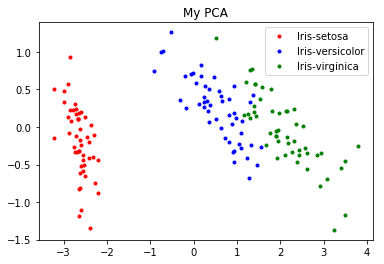

In [4]:
# Plot the iris dataset based on new features obtained through my PCA
y = myPCA(dataset)
plot_iris(y, 'My PCA')

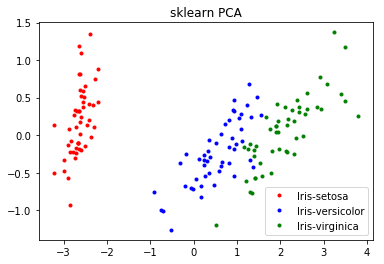

In [5]:
# Plot the iris dataset based on new features obtained through sklearn PCA
y = PCA(n_components=2).fit_transform(dataset)
plot_iris(y, 'sklearn PCA')

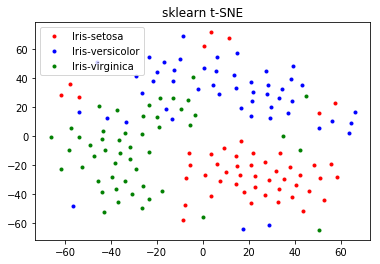

In [6]:
# Plot the iris dataset based on new features obtained through sklearn t-SNE
y = TSNE(n_components=2,random_state=0).fit_transform(dataset)
plot_iris(y,'sklearn t-SNE')

# Swiss roll dataset

In [7]:
from sklearn.datasets import make_swiss_roll
# Load the swiss roll dataset
X, _ = make_swiss_roll(random_state=0)

# Plot the swiss roll dataset on the obtained reduced features
def plot_swiss(y, title=''):
    plt.plot(y[:,0], y[:,1], 'r.')
    plt.title(title)
    plt.show()

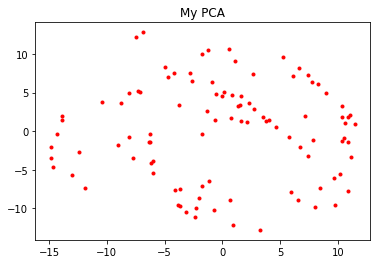

In [8]:
# Plot the swiss roll dataset based on new features obtained through my PCA
y = myPCA(X)
plot_swiss(y, 'My PCA')

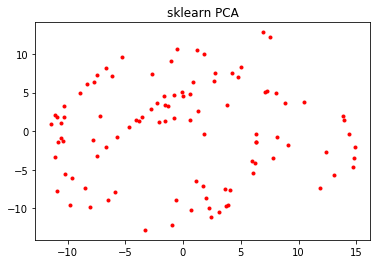

In [9]:
# Plot the swiss roll dataset based on new features obtained through sklearn PCA
y = PCA(n_components=2).fit_transform(X)
plot_swiss(y, 'sklearn PCA')

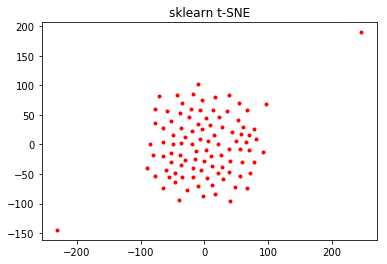

In [10]:
# Plot the swiss roll dataset based on new features obtained through sklearn t-SNE
y = TSNE(n_components=2,random_state=0).fit_transform(X)
plot_swiss(y, 'sklearn t-SNE')

# Report

1. The plot generated by my implementation of PCA and that of sklearn of same. (They are just mirror images because one eigen vector given by sklearn PCA is negative of that obtained by my PCA)
1. The t-SNE from sklearn did not perform well on the iris dataset when compared to that of PCA although the points belonging to one label were close in t-SNE, PCA made the distance between clusters high when compared to that of t-SNE.
1. In the case of swiss roll dataset the PCA spread out the dataset whereas t-SNE gathered the dataset as one unit.